In [1]:
#!pip install pandas

In [2]:
import pandas as pd

In [3]:
#create filepath to json file
filepath = "/path/winemag-data-130k-v2.json"

In [4]:
#read in json into pandas dataframe
df = pd.read_json(filepath, orient='columns')

In [5]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,None,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,None,None,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",None,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,None,Alexander Peartree,None,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [6]:
#drop unneeded columns
winescore = df.drop(columns=['description','designation','price','region_1',
                             'region_2','taster_name','taster_twitter_handle', 'winery'], axis=1)

In [7]:
winescore.head()

,country,points,province,title,variety
0,Italy,87,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend
1,Portugal,87,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red
2,US,87,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris
3,US,87,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling
4,US,87,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir


In [8]:
#drop all rows where country != Spain
spainwine = winescore[winescore.country == 'Spain']

In [9]:
len(spainwine.index)
spainwine.head()

,country,points,province,title,variety
5,Spain,87,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot
18,Spain,87,Northern Spain,Pradorey 2010 Vendimia Seleccionada Finca Vald...,Tempranillo Blend
81,Spain,86,Galicia,Spyro 2014 Albariño (Rías Baixas),Albariño
154,Spain,91,Central Spain,Marques de Griñon 2010 Single Vineyard Estate ...,Graciano
212,Spain,90,Northern Spain,Matarromera 2015 Fermentado en Barrica Verdejo...,Verdejo


In [10]:
# Remove wines that weren't harvested between 2000-2012

non_years = ["1990", "1991", "1992", "1993", "1995", "1995", "1996", "1997", "1998", "1999", 
             "2013", "2014", "2015", "2016", "2017", "2018", "2019"]

for index, row in spainwine.iterrows():
    
    for year in non_years:
        
        if year in row["title"]:
            
            try:
                spainwine = spainwine.drop([index])
                
            except KeyError:
                continue
                                

In [11]:
# Append a list of years

years_col = []

years = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012"]

for index, row in spainwine.iterrows():
    check = False
    
    for year in years:
        
        if year in row["title"]:
            
            years_col.append(int(year))
            check = True
            
    if check == False:
        try:
            spainwine = spainwine.drop([index])
                
        except KeyError:
            continue
        
spainwine["years"] = years_col

spainwine.head()
            

,country,points,province,title,variety,years
5,Spain,87,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,2011
18,Spain,87,Northern Spain,Pradorey 2010 Vendimia Seleccionada Finca Vald...,Tempranillo Blend,2010
154,Spain,91,Central Spain,Marques de Griñon 2010 Single Vineyard Estate ...,Graciano,2010
244,Spain,85,Northern Spain,J. & F. Lurton 2007 Herederos de François Lurt...,Red Blend,2007
287,Spain,92,Catalonia,Acústic 2010 Braó Vinyes Velles Carignan-Grena...,Carignan-Grenache,2010


In [12]:
len(spainwine.index)

4290

In [13]:
spainwine = spainwine.drop(columns=['country', 'title'], axis=1)
spainwine.head()

,points,province,variety,years
5,87,Northern Spain,Tempranillo-Merlot,2011
18,87,Northern Spain,Tempranillo Blend,2010
154,91,Central Spain,Graciano,2010
244,85,Northern Spain,Red Blend,2007
287,92,Catalonia,Carignan-Grenache,2010


In [14]:
spainwine.to_csv('/path/spainwine.csv')

In [15]:
import pandas as pd
from sqlalchemy import create_engine
import pymysql
pymysql.install_as_MySQLdb()

engine = create_engine('mysql://root:<password>@localhost/spanish_wine')

In [16]:
# Confirm tables
engine.table_names()

['weather', 'wine']

In [17]:
spainwine.to_sql(name='wine', con=engine, if_exists='append', index=False)

In [23]:
cabernet = spainwine.loc[spainwine['variety'] == 'Cabernet Sauvignon']

points = cabernet["points"].tolist()
variety = spainwine["variety"].tolist()
years = cabernet["years"].tolist()

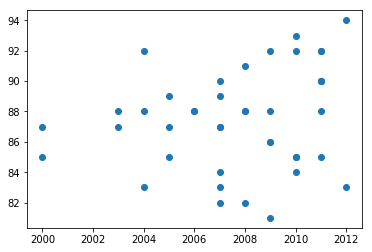

In [25]:
import matplotlib.pyplot as plt

plt.scatter(years, points, )
plt.show()